In [236]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/adibmenchali/DataVizProject/master/movies.csv"
df = pd.read_csv(url)
df.head()

,Title,Genre,Year,Rating,Director,Cast,Duration,Language,Country of Origin,Revenue,Budget
0,Avatar: The Way of Water,Science Fiction,2022.0,7.752,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",192.0,en,United States of America,2.310416e+09,460000000.0
1,Creed III,Drama,2023.0,7.290,Michael B. Jordan,"Michael B. Jordan, Tessa Thompson, Jonathan Ma...",116.0,en,United States of America,2.580000e+08,75000000.0
2,Winnie the Pooh: Blood and Honey,Horror,2023.0,5.913,Rhys Frake-Waterfield,"Craig David Dowsett, Chris Cordell, Amber Doig...",84.0,en,United Kingdom,3.200000e+06,100000.0
3,Mummies,Animation,2023.0,7.167,Juan Jesús García Galocha,"Óscar Barberán, Ana Esther Alborg, Luis Pérez ...",88.0,es,Spain,3.420000e+07,12300000.0
4,John Wick: Chapter 4,Action,2023.0,8.036,Chad Stahelski,"Keanu Reeves, Donnie Yen, Bill Skarsgård, Ian ...",169.0,en,United States of America,2.448783e+08,90000000.0


In [237]:
df.rename(columns={"Country of Origin": "CountryOfOrigin"},inplace=True)

In [238]:
print(f"Null values:\n{df.isnull().sum()}\n")
print(f"Duplicate values:\n{df.duplicated().sum()}")

Null values:
Title                0
Genre                2
Year                 2
Rating              17
Director             9
Cast                 5
Duration            20
Language             0
CountryOfOrigin     18
Revenue            438
Budget             463
dtype: int64

Duplicate values:
0


In [239]:
df.drop(["Revenue", "Budget"], axis=1, inplace=True)

In [240]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,Title,Genre,Year,Rating,Director,Cast,Duration,Language,CountryOfOrigin
5,Supercell,Action,2023.0,6.278,Herbert James Winterstern,"Skeet Ulrich, Anne Heche, Daniel Diemer, Jorda...",100.0,en,NaN
16,The Hunteress,Thriller,2023.0,5.591,Martín Duplaquet,"Natalia Reddersen, Willy Semler, Alexandra Von...",72.0,es,NaN
31,John Wick: Chapter 5,Action,NaN,NaN,NaN,NaN,NaN,en,United States of America
102,Fast X,Action,2023.0,NaN,Louis Leterrier,"Vin Diesel, Michelle Rodriguez, Tyrese Gibson,...",130.0,en,United States of America
109,El último hombre sobre la Tierra,Comedy,2022.0,6.500,Juan Camilo Pinzón,"Jhon Álex Toro, Laura Acuña, Rodrigo Candamil",87.0,es,NaN
112,Evil Dead Rise,Horror,2023.0,NaN,Lee Cronin,"Lily Sullivan, Alyssa Sutherland, Morgan Davie...",96.0,en,Ireland
135,Orgasm Inc: The Story of OneTaste,Documentary,2022.0,6.404,Sloane Klevin,NaN,89.0,en,United States of America
149,Housewife Sex Slaves: Hatano Yui,NaN,2017.0,NaN,NaN,Yui Hatano,118.0,ja,Japan
161,Balik Taya,Thriller,2023.0,2.000,Roman Perez Jr.,"Angeli Khang, Jela Cuenca, Kiko Estrada, Azi A...",NaN,tl,Philippines
164,Orgasm Lecture 2,Drama,2020.0,10.000,NaN,"Min Do-yoon, Park Soo-bin-III, Hong Sae-hee, B...",73.0,ko,South Korea


In [241]:
df.dropna(inplace=True)
print(f"Null values:\n{df.isnull().sum()}\n")
print(f"Duplicate values:\n{df.duplicated().sum()}")

Null values:
Title              0
Genre              0
Year               0
Rating             0
Director           0
Cast               0
Duration           0
Language           0
CountryOfOrigin    0
dtype: int64

Duplicate values:
0


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            954 non-null    object 
 1   Genre            954 non-null    object 
 2   Year             954 non-null    float64
 3   Rating           954 non-null    float64
 4   Director         954 non-null    object 
 5   Cast             954 non-null    object 
 6   Duration         954 non-null    float64
 7   Language         954 non-null    object 
 8   CountryOfOrigin  954 non-null    object 
dtypes: float64(3), object(6)
memory usage: 74.5+ KB


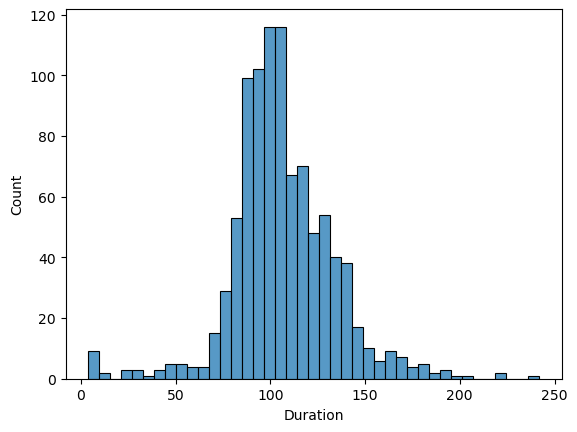

In [135]:
sns.histplot(data=df, x="Duration")
plt.show()

In [243]:
df["Type"] = df["Duration"].apply(lambda x: "Short" if x <= 40 else "Normal")


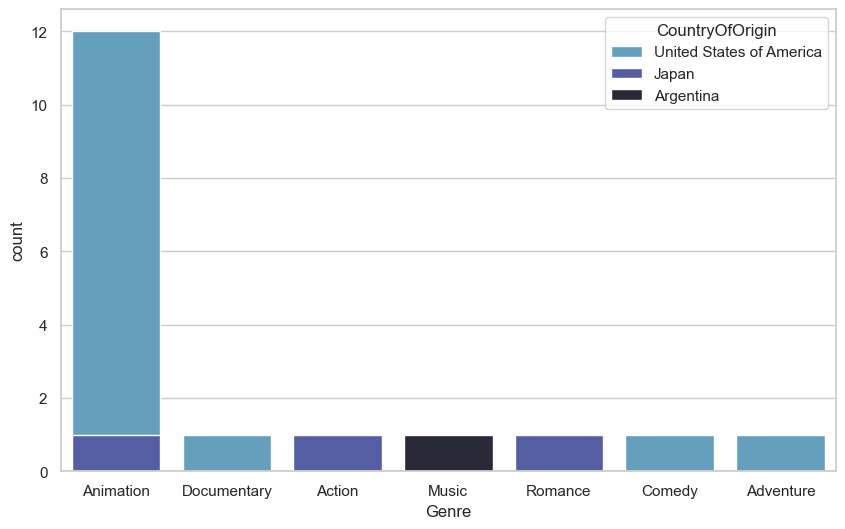

In [252]:
colors = sns.color_palette('icefire')
plt.figure(figsize=(10, 6))
sns.countplot(data=short_movies, x="Genre", hue="CountryOfOrigin", palette=colors,dodge=False)
plt.show()

In [188]:
df.describe()

,Year,Rating,Duration
count,954.000000,954.000000,954.000000
mean,2015.034591,6.842723,106.634172
std,11.499343,0.944801,27.710642
min,1937.000000,1.000000,4.000000
25%,2012.000000,6.327500,92.000000
50%,2020.000000,6.912000,104.000000
75%,2022.000000,7.490500,121.000000
max,2023.000000,10.000000,242.000000


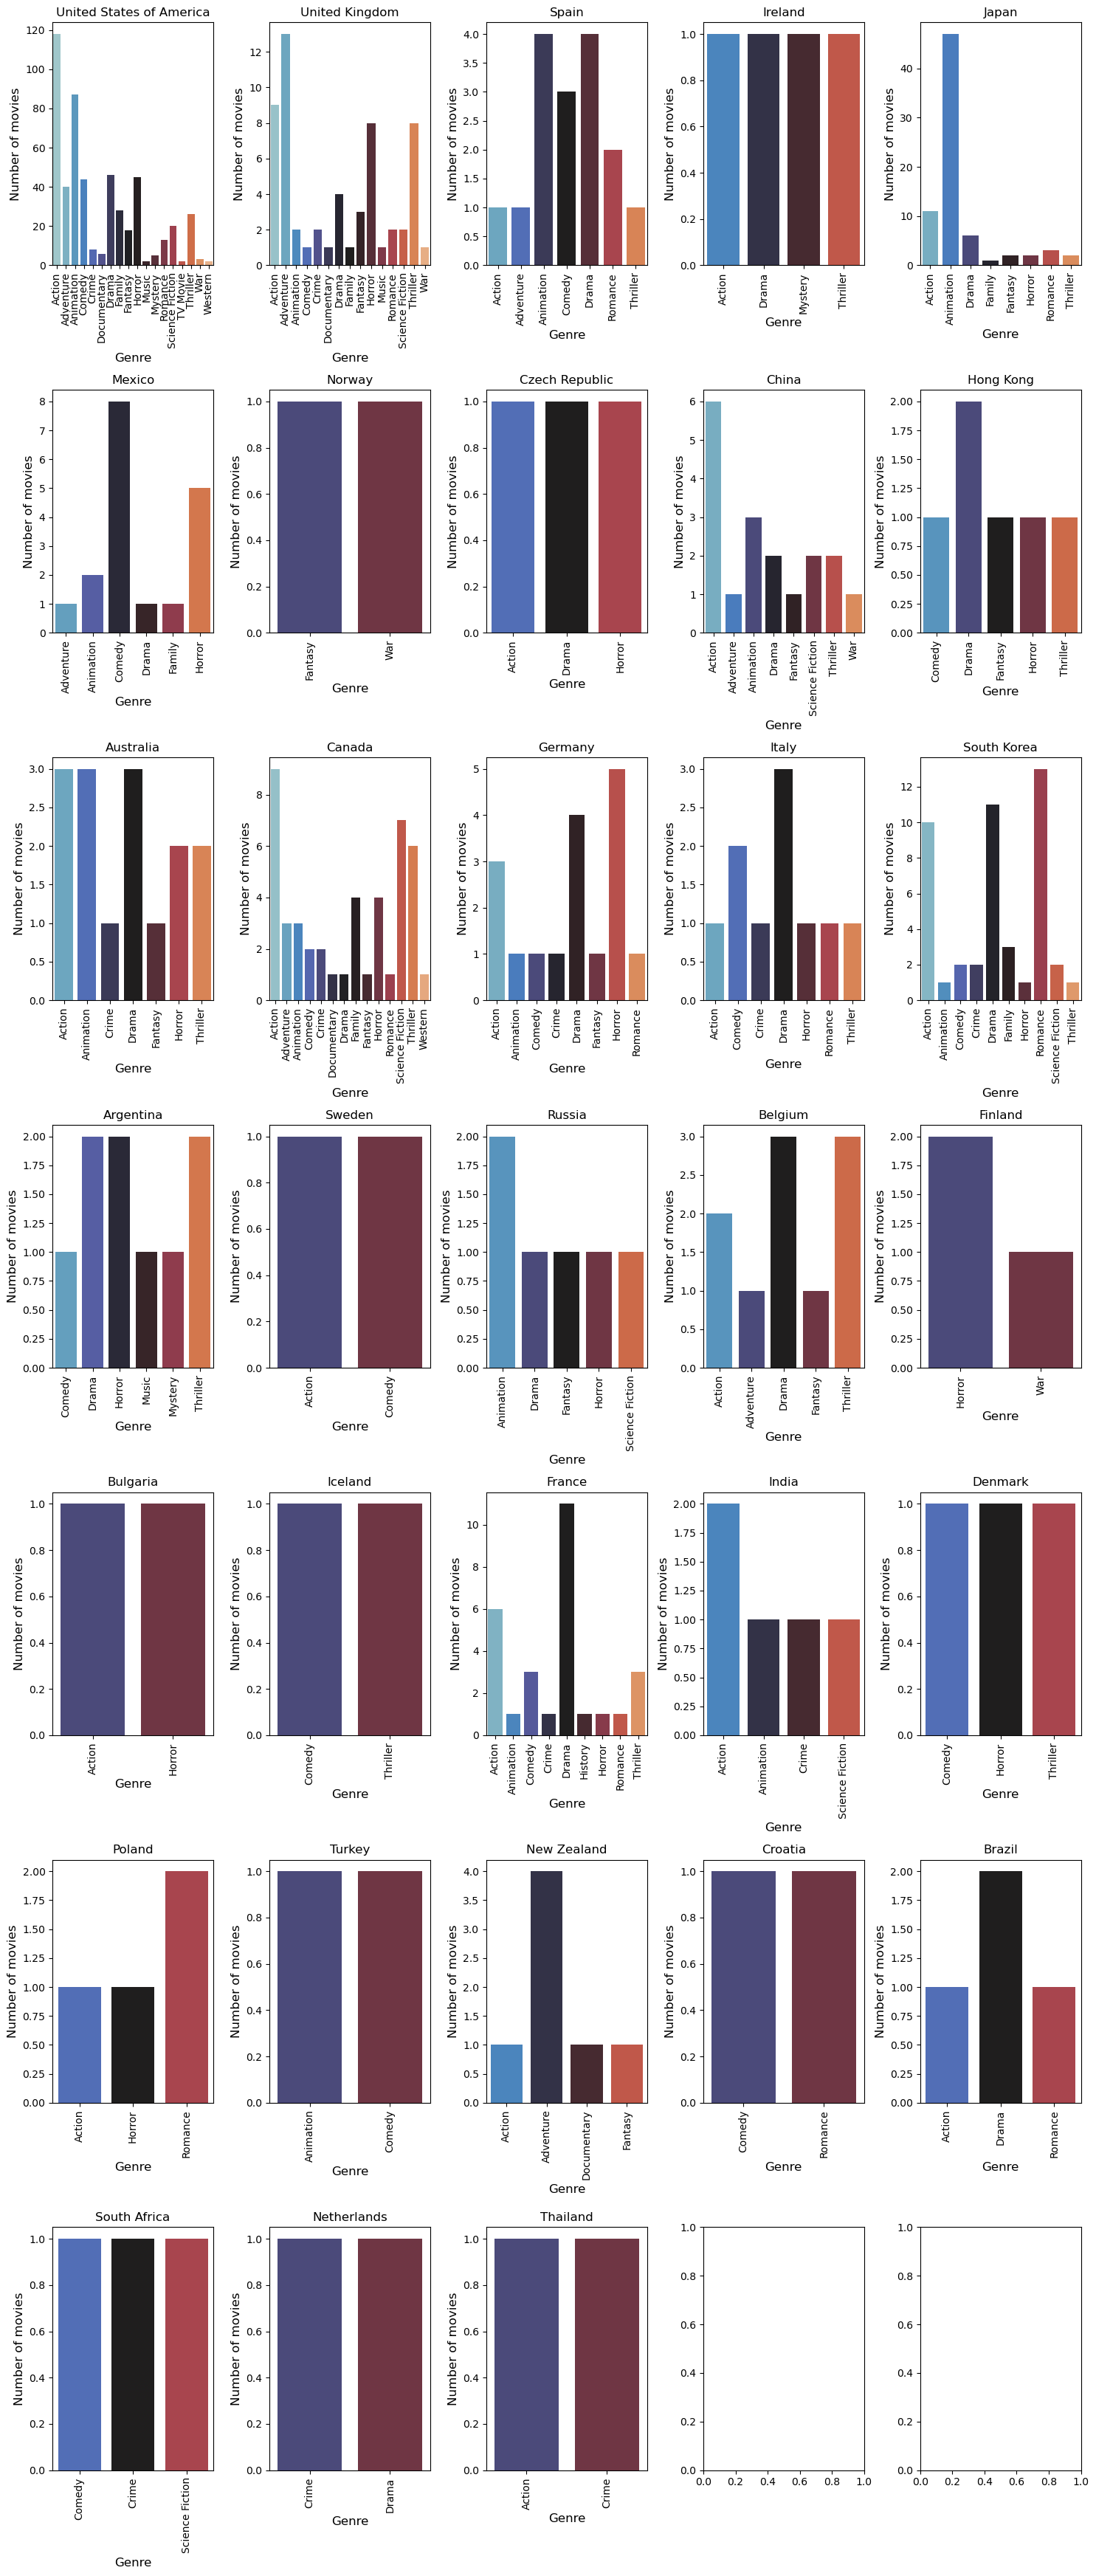

In [150]:
# Filter out rows with missing values
df = df[df["CountryOfOrigin"] != "N/A"]
df = df[df["Genre"] != "N/A"]

# Get unique countries
countries = df["CountryOfOrigin"].unique()

# Count the number of occurrences of each country
counts = df["CountryOfOrigin"].value_counts()

# Filter out countries that appear less than twice
countries = [country for country in countries if counts[country] >= 2]

# Calculate number of rows and columns needed
nrows = len(countries) // 5 + (len(countries) % 5 > 0)
ncols = 5

# Create a grid of plots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))

# Loop over each country and create a plot
for i, country in enumerate(countries):
    row = i // ncols
    col = i % ncols

    dfx = df[df["CountryOfOrigin"] == country]
    dfx = dfx.groupby(["Genre"]).size().reset_index(name="Count")
    sns.barplot(x="Genre", y="Count", data=dfx, ax=axes[row, col], palette="icefire")

    sns.barplot(x="Genre", y="Count", data=dfx, ax=axes[row][col], palette="icefire")
    axes[row][col].set_title(f"{country}")
    axes[row][col].set_xlabel("Genre", fontsize=12)
    axes[row][col].set_ylabel("Number of movies", fontsize=12)
    axes[row][col].tick_params(axis='x', labelrotation=90)

# Adjust spacing between plots
plt.tight_layout()

# Show the plot
plt.show()

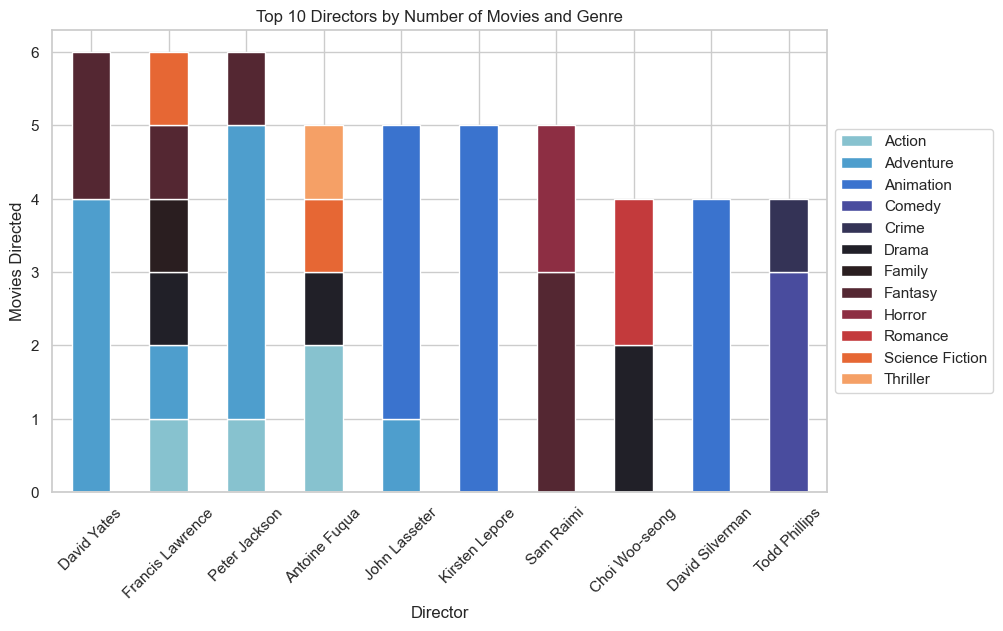

In [255]:
genres = df['Genre'].value_counts()
directors = df['Director'].value_counts().head(10)
# Create a new dataframe with the top 10 directors and genres
df_top = df[df['Director'].isin(directors.index) & df['Genre'].isin(genres.index)]

# Group by director and genre
grouped = df_top.groupby(['Director', 'Genre']).size().unstack()

# Sort the data by the sum of each row
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Plot the data
colors = sns.color_palette('icefire',n_colors=12)

ax = grouped.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# Add labels and title
ax.set_xlabel('Director')
ax.set_ylabel('Movies Directed')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Top 10 Directors by Number of Movies and Genre')


# Move the legend outside of the plot area
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Show the plot
plt.show()

In [174]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
# Group by genre and calculate mean rating and count
genre_ratings = df.groupby('Genre')['Rating'].agg(['mean', 'count'])

# Create a ColumnDataSource object
source = ColumnDataSource(data=dict(x=genre_ratings['count'], y=genre_ratings['mean'], genre=genre_ratings.index))

# Create a figure object
p = figure(title='Average Rating by Genre')

# Add a circle glyph to the figure
p.circle('x', 'y', size=10, source=source, color='blue')

# Add a hover tool to the figure
hover = HoverTool(tooltips=[('Genre', '@genre'), ('Count', '@x'), ('Mean Rating', '@y')])
p.add_tools(hover)

# Show the plot
show(p)

In [266]:
# Get a list of distinct colors
colors = px.colors.qualitative.Alphabet

# Group by genre and calculate mean rating and count
genre_ratings = df.groupby('Genre')['Rating'].agg(['mean', 'count']).reset_index()

# Create the scatter plot
fig = px.scatter(genre_ratings, x='count', y='mean', color='Genre', size='count', hover_data=['Genre'], color_discrete_sequence=colors)

# Update the layout of the plot
fig.update_layout(
    title='Average Rating by Genre',
    xaxis_title='Number of Movies',
    yaxis_title='Average Rating',
    plot_bgcolor='white'
)

# Show the plot
fig.show()

In [173]:
!pip install bokeh

     ---------------------------------------- 8.3/8.3 MB 3.3 MB/s eta 0:00:00
     -------------------------------------- 155.4/155.4 kB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB ? eta 0:00:00


In [127]:
'''
import plotly.graph_objects as go
import seaborn as sns

# Get the 10 most popular directors
directors = df['Director'].value_counts().head(10)

# Get all genres
genres = df['Genre'].unique()

# Create a new dataframe with the top 10 directors and all genres
df_top = df[df['Director'].isin(directors.index) & df['Genre'].isin(genres)]

# Group by director and genre
grouped = df_top.groupby(['Director', 'Genre']).size().unstack().reset_index()

# Define a color palette
colors = sns.color_palette('Set2', n_colors=len(genres))

# Create a list of traces for each genre
traces = []
for i in range(len(genres)):
    if genres[i] in grouped.columns:
        trace = go.Bar(
            x=grouped['Director'],
            y=grouped[genres[i]],
            marker=dict(color=colors[i])
        )
        if i+1 < len(genres) and genres[i+1] in grouped.columns:
            trace.text = grouped[genres[i+1]]
        traces.append(trace)

# Create the stacked bar chart
fig = go.Figure(data=traces)

# Add interactivity to the plot
fig.update_traces(hovertemplate='%{y} %{text} movies')

# Update the layout
fig.update_layout(barmode='stack', xaxis_title='Director', yaxis_title='Number of movies',
                  title='Top 10 Directors by Number of Movies and Genre')

# Show the plot
fig.show()
'''

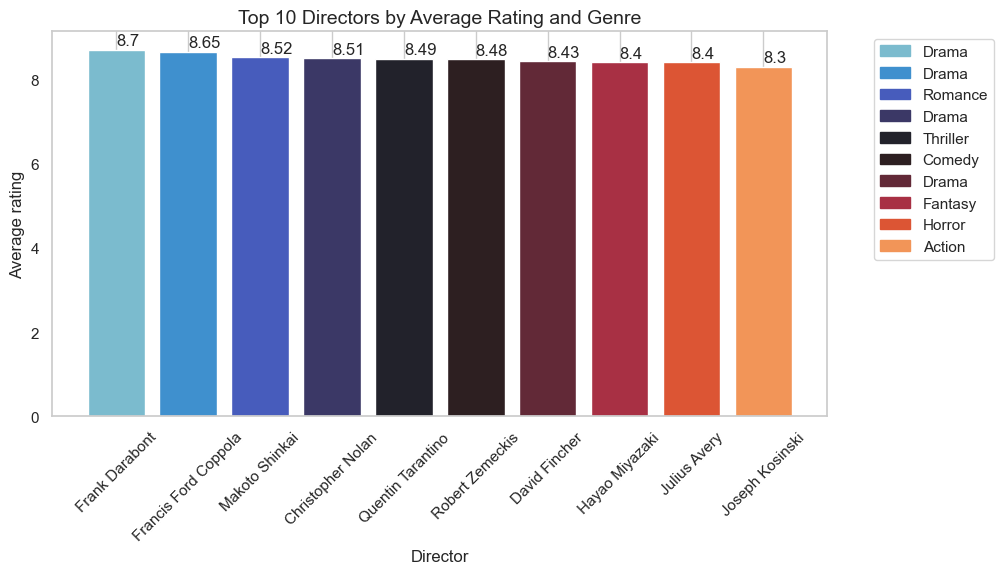

In [262]:

# Filter the dataframe to include only directors with more than 1 movie
df_filtered = df.groupby('Director').filter(lambda x: len(x) > 1)

# Calculate the mean rating for each director
directors = df_filtered.groupby(['Director', 'Genre'])['Rating'].mean().sort_values(ascending=False).reset_index()
top_directors = directors.groupby('Director').first().sort_values('Rating', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 5))
colors = sns.color_palette('icefire', n_colors=len(top_directors))
plt.bar(top_directors.index, top_directors['Rating'], color=colors)

# Add labels and title
plt.xlabel('Director', fontsize=12)
plt.ylabel('Average rating', fontsize=12)
plt.title('Top 10 Directors by Average Rating and Genre', fontsize=14)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Add grid lines
plt.grid(axis='y', linestyle='')

for i, v in enumerate(top_directors['Rating']):
    plt.text(i, v + 0.1, str(round(v, 2))) 

# Add legend
patches = [mpatches.Patch(color=colors[i], label=top_directors.iloc[i]['Genre']) for i in range(len(top_directors))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

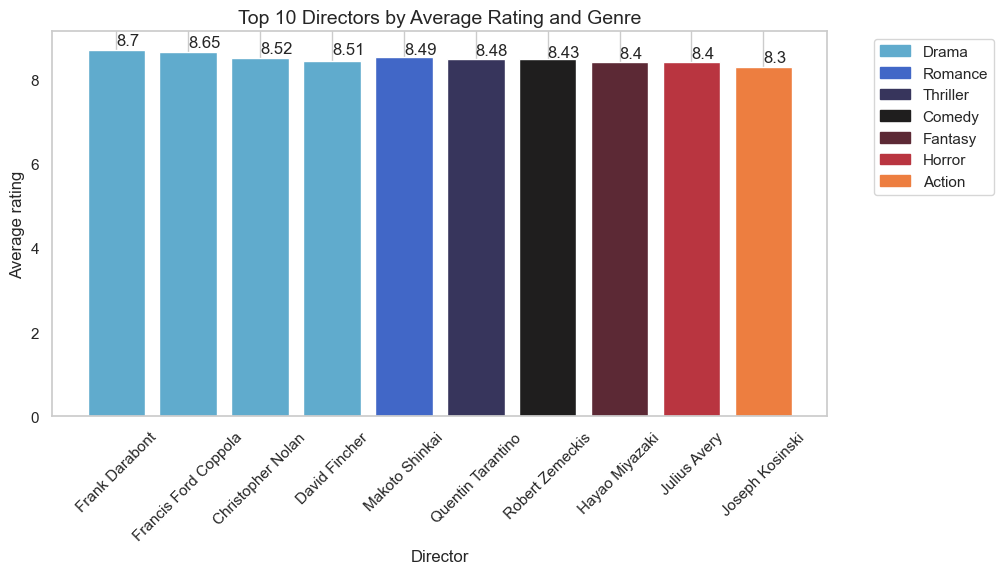

In [265]:
#Filter the dataframe to include only directors with more than 1 movie
df_filtered = df.groupby('Director').filter(lambda x: len(x) > 1)

# Calculate the mean rating for each director and genre
directors = df_filtered.groupby(['Director', 'Genre'])['Rating'].mean().sort_values(ascending=False).reset_index()
top_directors = directors.groupby('Director').first().reset_index().sort_values('Rating', ascending=False).head(10)
# Create a bar plot
plt.figure(figsize=(10, 5))
genres = top_directors['Genre'].unique()
colors = sns.color_palette('icefire', n_colors=len(genres))
for i, genre in enumerate(genres):
    df_genre = top_directors[top_directors['Genre'] == genre]
    plt.bar(df_genre['Director'], df_genre['Rating'], color=colors[i])

# Add labels and title
plt.xlabel('Director', fontsize=12)
plt.ylabel('Average rating', fontsize=12)
plt.title('Top 10 Directors by Average Rating and Genre', fontsize=14)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Add grid lines
plt.grid(axis='y', linestyle='')

for i, v in enumerate(top_directors['Rating']):
    plt.text(i, v + 0.1, str(round(v, 2)))

# Add legend
patches = [mpatches.Patch(color=colors[i], label=genres[i]) for i in range(len(genres))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [264]:
df_genre

,Genre,Rating
Director,,
Frank Darabont,Drama,8.702
Francis Ford Coppola,Drama,8.654
Christopher Nolan,Drama,8.509
David Fincher,Drama,8.431


In [79]:
# Sort the movies by rating and group them by country
df_sorted = df.sort_values(by="Rating", ascending=False)
df_grouped = df_sorted.groupby("CountryOfOrigin").head(10)

# Create a choropleth map
fig = px.choropleth(df_grouped, locations="CountryOfOrigin", locationmode="country names",
                    color="Rating", hover_name="Title",
                    title="Top 10 Movies by Country")
fig.update_layout(geo_scope="world")

# Make the map interactive
fig.update_traces(hovertemplate="<b>%{location}</b><br><br>" +
                                 "<b>Movie:</b> %{Title}<br>" +
                                 "<b>Rating:</b> %{Rating}<br>" +
                                 "<b>Director:</b> %{Director}<br>" +
                                 "<b>Cast:</b> %{Cast}<br>" +
                                 "<b>Duration:</b> %{Duration}<br>" +
                                 "<b>Language:</b> %{Language}<br>")
fig.update_layout(hovermode="event+select")

fig.show()

In [33]:
value_counts = df["Language"].value_counts()

# Create a bar chart
fig = px.bar(value_counts, x=value_counts.index, y=value_counts.values,
             title="Value Counts for Language")
fig.show()

NameError: name 'px' is not defined

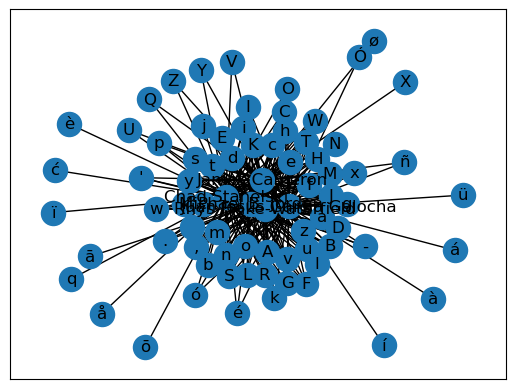

In [69]:
directors = df["Director"].unique()[:5]
cast = df["Cast"].tolist()
actors = set()
for movie_cast in cast:
    #print(movie_cast)
    for actor in movie_cast:
        actors.add(actor)

G = nx.Graph()
for director in directors:
    G.add_node(director)
    for i, row in df.iterrows():
        if director in row["Director"]:
            for actor in row["Cast"]:
                if actor in actors:
                    G.add_edge(director, actor)

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, with_labels=True)
plt.show()

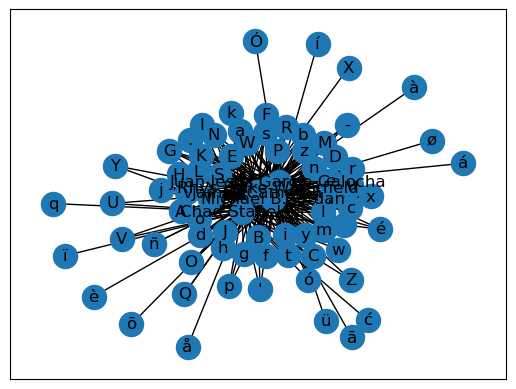

In [81]:
directors = df["Director"].unique()[:5]
cast = df["Cast"].tolist()
actors = set()
for movie_cast in cast:
    actors.update(movie_cast)

G = nx.Graph()
for director in directors:
    has_edge = False
    for i, row in df.iterrows():
        if director in row["Director"]:
            for actor in row["Cast"]:
                if actor in actors:
                    G.add_edge(director, actor)
                    has_edge = True
    if has_edge:
        G.add_node(director)

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, with_labels=True)
plt.show()

In [32]:
df_grouped = df.groupby(["Genre"]).mean(numeric_only=True).reset_index()

# Create a bar chart
fig = px.bar(df_grouped, x="Genre", y="Duration",
             title="Average Duration by Genre")
fig.show()

NameError: name 'px' is not defined

In [80]:
import ast

df["Cast"] = df["Cast"].apply(ast.literal_eval)

directors = df["Director"].unique()[:5]
cast = df["Cast"].tolist()
actors = set()
for movie_cast in cast:
    actors.update(movie_cast)

G = nx.Graph()
for director in directors:
    has_edge = False
    for i, row in df.iterrows():
        if director in row["Director"]:
            for actor in row["Cast"]:
                if actor in actors:
                    G.add_edge(director, actor)
                    has_edge = True
    if has_edge:
        G.add_node(director)

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, with_labels=True)
plt.show()

SyntaxError: invalid syntax (<unknown>, line 1)

In [189]:
df_grouped = df.groupby(["CountryOfOrigin"]).mean(numeric_only=True).reset_index()

# Create a bar chart
fig = px.bar(df_grouped, x="CountryOfOrigin", y="Rating",
             title="Average Rating by Country of Origin")
fig.show()

In [251]:
bins = [0, 60, 120, 180, 240]
labels = ["Less than an hour", "Between 1 and 2 hours", "Between 2 and 3 hours", "More than 3 hours"]
df["duration_group"] = pd.cut(df["Duration"], bins=bins, labels=labels)

dfx = df.groupby("duration_group")["Rating"].mean().reset_index()

fig = px.scatter(dfx, x="duration_group", y="Rating", title="Average Rating based on Duration")
fig.update_layout(plot_bgcolor="white")

fig2 = px.line(dfx, x="duration_group", y="Rating", title="Average Rating vs Duration of Movie")
fig2.update_layout(plot_bgcolor="white")
fig.update_xaxes(title_text="Duration Group")
fig.update_xaxes(title_text="Duration Group")
fig.update_yaxes(title_text="Average Rating")


fig.add_trace(fig2.data[0])

fig.show()

In [253]:
df.CountryOfOrigin.value_counts()

United States of America    513
Japan                        74
United Kingdom               58
South Korea                  46
Canada                       45
France                       28
Mexico                       18
China                        18
Germany                      17
Spain                        16
Australia                    15
Belgium                      10
Italy                        10
Argentina                     9
New Zealand                   7
Hong Kong                     6
Russia                        6
India                         5
Brazil                        4
Ireland                       4
Poland                        4
South Africa                  3
Czech Republic                3
Finland                       3
Denmark                       3
Croatia                       2
Netherlands                   2
Turkey                        2
Iceland                       2
Thailand                      2
Bulgaria                      2
Sweden  